In [29]:
import LinAlg as LA
import DataIO as io
import matplotlib.pyplot as plt
import numpy as np

In [30]:
# Example Usage
v1 = LA.Vector(1, 2, 3)
v2 = LA.Vector(4, 5, 6)

# Add vectors
v3 = v1 + v2
print(f"v1 + v2 = {v3}")

# Subtract vectors
v4 = v1 - v2
print(f"v1 - v2 = {v4}")

# Dot product
dot_product = v1.dot(v2)
print(f"v1 . v2 = {dot_product}")

# Cross product
v5 = v1.cross(v2)
print(f"v1 x v2 = {v5}")

# Magnitude
mag_v1 = v1.magnitude()
print(f"|v1| = {mag_v1}")


v1 + v2 = Vector(5.00, 7.00, 9.00)
v1 - v2 = Vector(-3.00, -3.00, -3.00)
v1 . v2 = 32.0
v1 x v2 = Vector(-3.00, 6.00, -3.00)
|v1| = 3.7416574954986572


In [31]:
file_path = r"./PA_1_Data/pa1-debug-a-calreadings.txt"
d_vectors, a_vectors, c_vectors, N_D, N_A, N_C = io.read_calbody_file(file_path)

file_path = r"./PA_1_Data/pa1-debug-a-calreadings.txt"
frames_data = io.read_calreadings_file(file_path)
# Example Usage:
calreadings_frames = frames_data
calbody_vectors = a_vectors
# Perform registration for each frame
F_A_point_cloud = LA.perform_calibration_registration_for_frames(calreadings_frames, calbody_vectors, vector_type='A')

# Output the registration results
for frame_num, result in F_A_point_cloud.items():
    print(f"Frame {frame_num}:")
    print(f"  Rotation matrix (R):\n{result.rotation}")
    print(f"  Translation vector (t): {result.translation}")


Frame 1:
  Rotation matrix (R):
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
  Translation vector (t): [0. 0. 0.]
Frame 2:
  Rotation matrix (R):
[[ 9.99316743e-01 -2.82571604e-02  2.38239439e-02]
 [ 2.82503422e-02  9.99600685e-01  6.22772499e-04]
 [-2.38320284e-02  5.06875820e-05  9.99715976e-01]]
  Translation vector (t): [ 36.1040255   -3.26179798 242.2408329 ]
Frame 3:
  Rotation matrix (R):
[[ 0.99939304 -0.03193952  0.01390744]
 [ 0.03173441  0.99938783  0.01472743]
 [-0.01436932 -0.01427715  0.99979482]]
  Translation vector (t): [ 26.65991937 255.36388633   5.18728448]
Frame 4:
  Rotation matrix (R):
[[ 9.99955839e-01  9.39736326e-03 -9.59956480e-05]
 [-9.38914352e-03  9.99416625e-01  3.28367790e-02]
 [ 4.04518787e-04 -3.28344276e-02  9.99460723e-01]]
  Translation vector (t): [ -2.00021586 286.08411721 245.24653407]
Frame 5:
  Rotation matrix (R):
[[ 0.99963609 -0.02534023  0.0092501 ]
 [ 0.02526592  0.99964824  0.00806414]
 [-0.00945119 -0.00782749  0.9999247 ]]
  Translation vector 

Frame 1 RMSE: 0.0


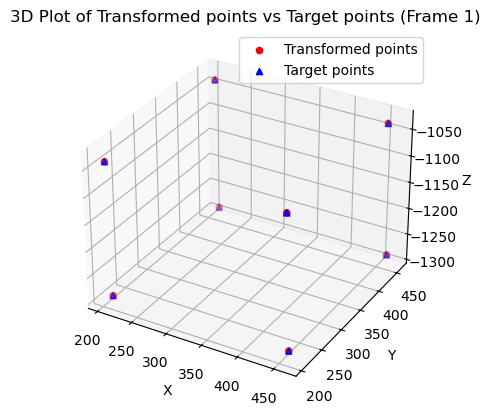

Frame 2 RMSE: 0.002920676488429308


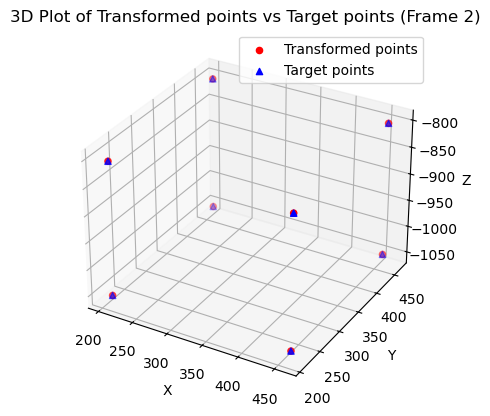

Frame 3 RMSE: 0.0032528387382626534


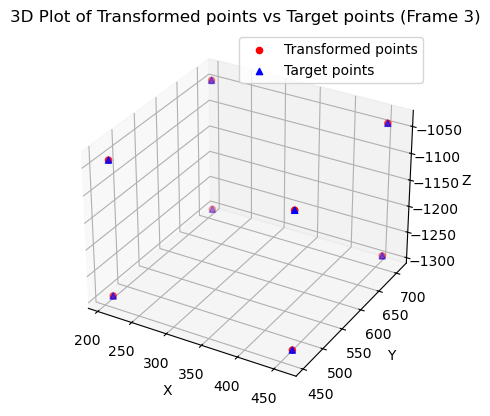

Frame 4 RMSE: 0.003317815950140357


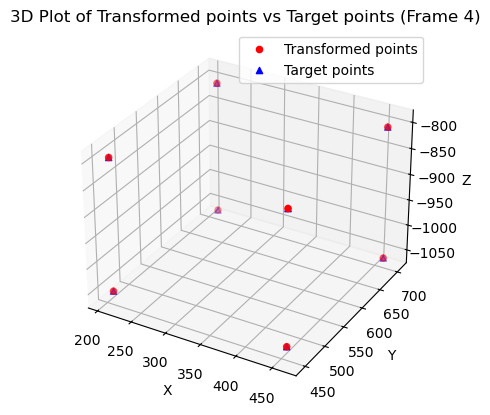

Frame 5 RMSE: 0.003431128803640604


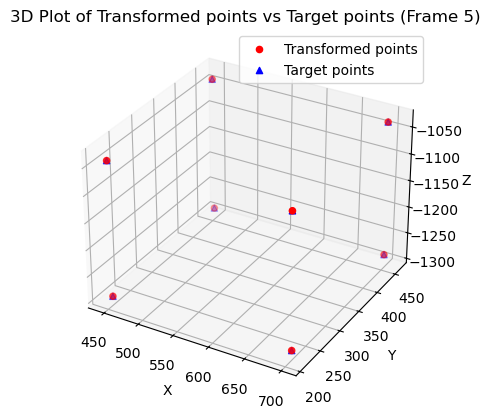

Frame 6 RMSE: 0.0035790237598121166


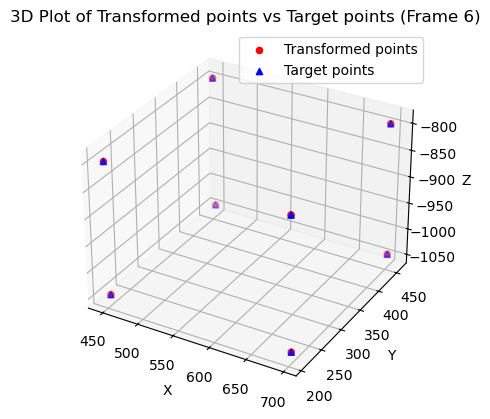

Frame 7 RMSE: 0.0031415200792253017


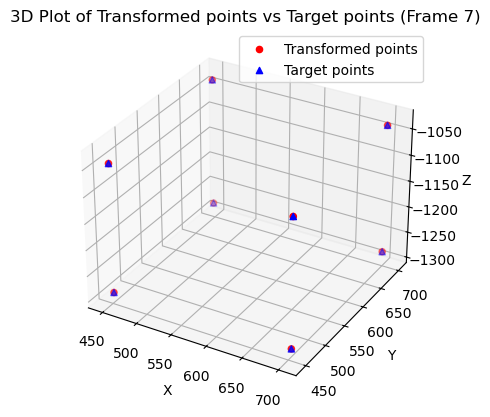

Frame 8 RMSE: 0.0030557289719581604


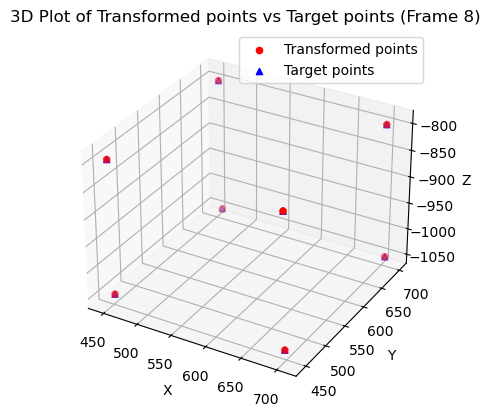

In [32]:

F_A_point_cloud = LA.perform_calibration_registration_for_frames(calreadings_frames, calbody_vectors, vector_type='A')

rmse_results = {}

# Loop through each frame in the point cloud registration results
for frame_num, frame in F_A_point_cloud.items():
    # Extract the source points (calbody a_vectors) for transformation
    a_points = [LA.Vector(vec.coords[0], vec.coords[1], vec.coords[2]) for vec in calbody_vectors]  # Source points (a_vectors)
    
    # Extract the target points (A_points) from calreadings_frames
    A_points = [LA.Vector(vec.coords[0], vec.coords[1], vec.coords[2]) for vec in calreadings_frames[frame_num]['a_vectors']]  # Target points

    # Apply the transformation to a_points
    transformed_a_points = LA.transform_points(frame, a_points)

    # Compute the RMSE between the transformed a_points and A_points
    transformed_array = np.array([v.as_array() for v in transformed_a_points])
    target_array = np.array([v.as_array() for v in A_points])
    rmse = LA.compute_rmse(transformed_array, target_array)
    rmse_results[frame_num] = rmse

    # Output the RMSE result
    print(f"Frame {frame_num} RMSE: {rmse}")

    # Plot the transformed a_points vs target A_points
    LA.plot_3d_transformed_vs_target(frame_num, transformed_a_points, A_points)


Find F_D

In [33]:
file_path = r"./PA_1_Data/pa1-debug-a-calbody.txt"
d_vectors, a_vectors, c_vectors, N_D, N_A, N_C = io.read_calbody_file(file_path)

file_path = r"./PA_1_Data/pa1-debug-a-calreadings.txt"
frames_data = io.read_calreadings_file(file_path)

calreadings_frames = frames_data
calbody_vectors = d_vectors
# Perform registration for each frame
F_D_point_cloud = LA.perform_calibration_registration_for_frames(calreadings_frames, calbody_vectors, vector_type='D')

# Output the registration results
for frame_num, result in F_D_point_cloud.items():
    print(f"Frame {frame_num}:")
    print(f"  Rotation matrix (R):\n{result.rotation}")
    print(f"  Translation vector (t): {result.translation}")

Frame 1:
  Rotation matrix (R):
[[ 0.26088979 -0.73911017  0.6210094 ]
 [-0.73911023  0.26088981  0.62100932]
 [-0.62100933 -0.62100939 -0.4782204 ]]
  Translation vector (t): [  0.60587743   0.60587743 -12.42608778]
Frame 2:
  Rotation matrix (R):
[[ 0.26088979 -0.73911017  0.6210094 ]
 [-0.73911023  0.26088981  0.62100932]
 [-0.62100933 -0.62100939 -0.4782204 ]]
  Translation vector (t): [  0.60587743   0.60587743 -12.42608778]
Frame 3:
  Rotation matrix (R):
[[ 0.26088979 -0.73911017  0.6210094 ]
 [-0.73911023  0.26088981  0.62100932]
 [-0.62100933 -0.62100939 -0.4782204 ]]
  Translation vector (t): [  0.60587743   0.60587743 -12.42608778]
Frame 4:
  Rotation matrix (R):
[[ 0.26088979 -0.73911017  0.6210094 ]
 [-0.73911023  0.26088981  0.62100932]
 [-0.62100933 -0.62100939 -0.4782204 ]]
  Translation vector (t): [  0.60587743   0.60587743 -12.42608778]
Frame 5:
  Rotation matrix (R):
[[ 0.26088979 -0.73911017  0.6210094 ]
 [-0.73911023  0.26088981  0.62100932]
 [-0.62100933 -0.62100

In [34]:
F_D_frames = F_D_point_cloud

Frame 1 RMSE: 750.3082885742188


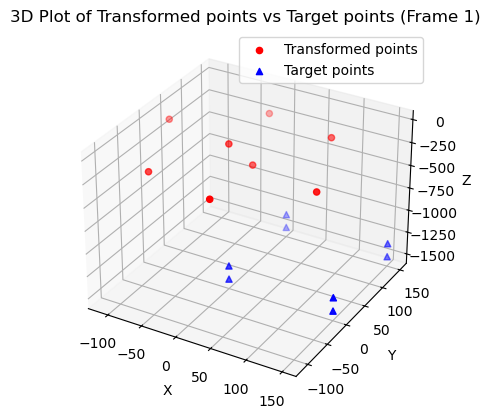

Frame 2 RMSE: 750.3082885742188


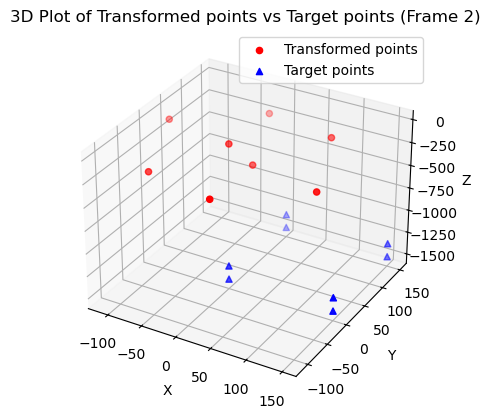

Frame 3 RMSE: 750.3082885742188


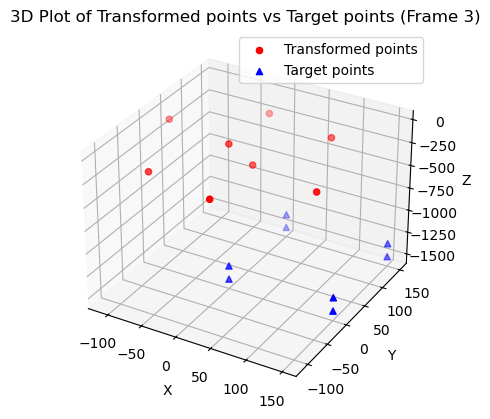

Frame 4 RMSE: 750.3082885742188


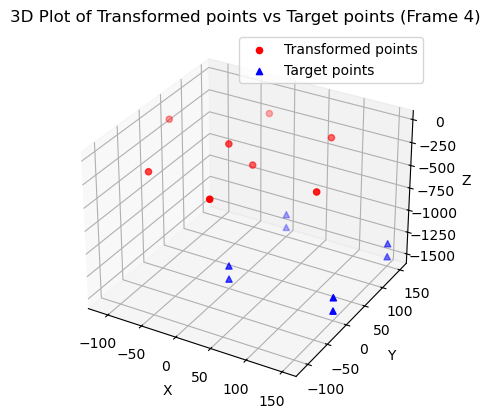

Frame 5 RMSE: 750.3082885742188


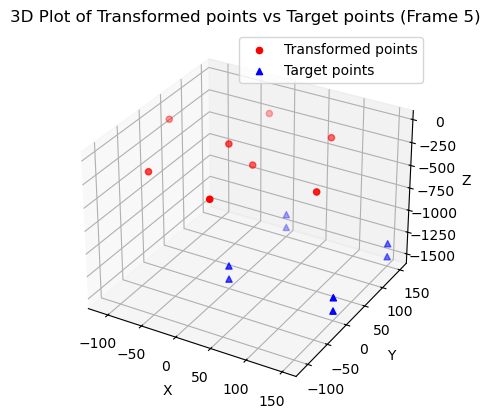

Frame 6 RMSE: 750.3082885742188


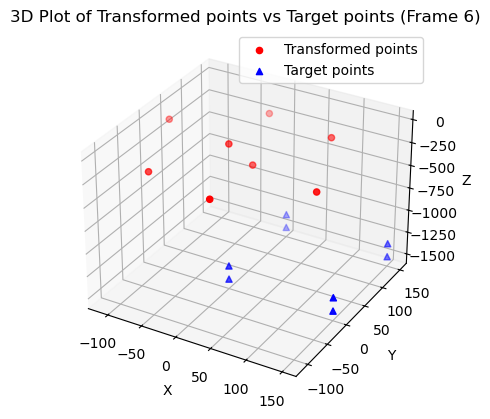

Frame 7 RMSE: 750.3082885742188


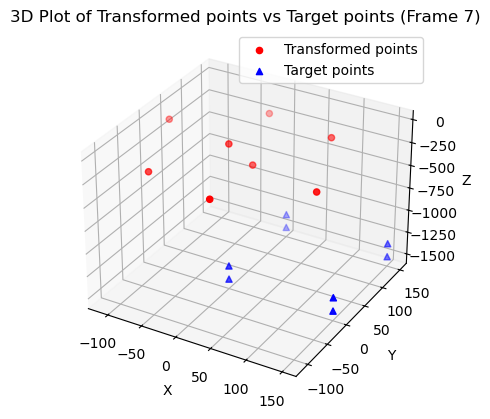

Frame 8 RMSE: 750.3082885742188


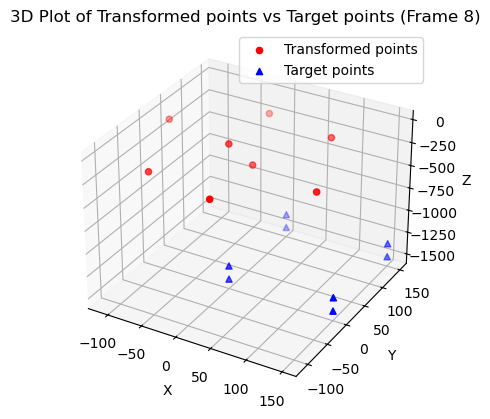

In [35]:
F_D_point_cloud = LA.perform_calibration_registration_for_frames(calreadings_frames, calbody_vectors, vector_type='D')
calbody_vectors = d_vectors
rmse_results = {}

# Loop through each frame in the point cloud registration results
for frame_num, frame in F_D_point_cloud.items():
    # Extract the source points (calbody a_vectors) for transformation
    d_points = [LA.Vector(vec.coords[0], vec.coords[1], vec.coords[2]) for vec in calbody_vectors]  # Source points (a_vectors)
    
    # Extract the target points (D_points) from calreadings_frames
    D_points = [LA.Vector(vec.coords[0], vec.coords[1], vec.coords[2]) for vec in calreadings_frames[frame_num]['d_vectors']]  # Target points

    # Apply the transformation to d_points
    transformed_d_points = LA.transform_points(frame, d_points)

    # Compute the RMSE between the transformed d_points and D_points
    transformed_array = np.array([v.as_array() for v in transformed_d_points])
    target_array = np.array([v.as_array() for v in D_points])
    rmse = LA.compute_rmse(transformed_array, target_array)
    rmse_results[frame_num] = rmse

    # Output the RMSE result
    print(f"Frame {frame_num} RMSE: {rmse}")

    # Plot the transformed d_points vs target D_points
    LA.plot_3d_transformed_vs_target(frame_num, transformed_d_points, D_points)


Frame 1 RMSE: 439.580810546875


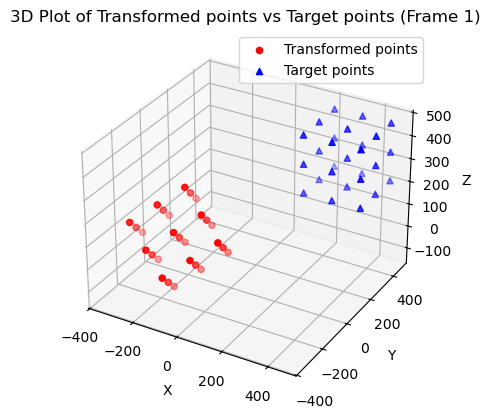

Frame 2 RMSE: 633.8790893554688


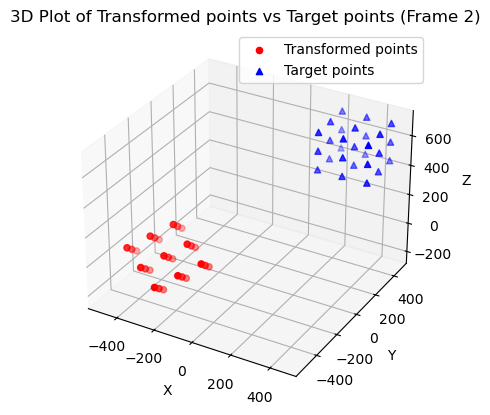

Frame 3 RMSE: 567.567138671875


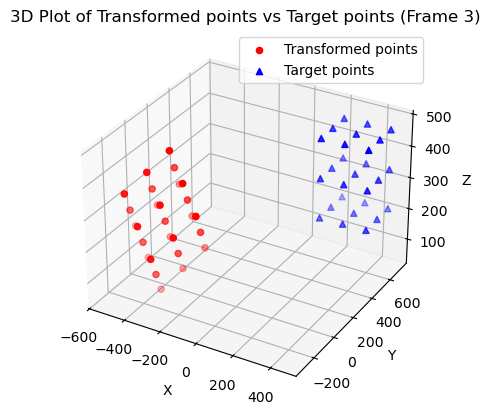

Frame 4 RMSE: 726.1159057617188


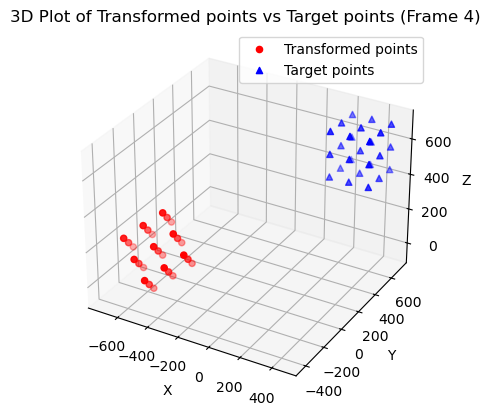

Frame 5 RMSE: 562.8457641601562


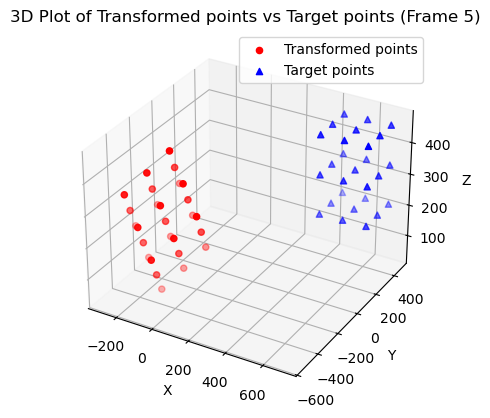

Frame 6 RMSE: 722.4559936523438


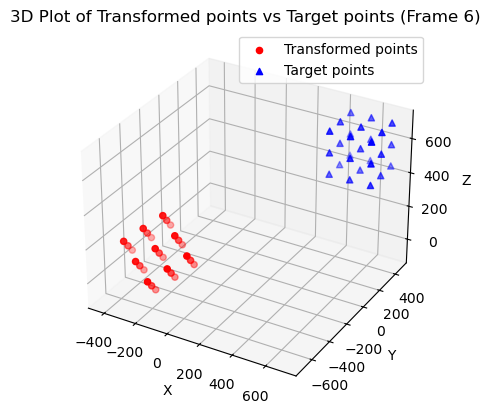

Frame 7 RMSE: 702.2594604492188


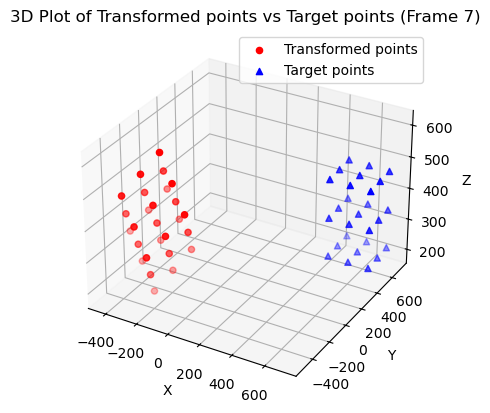

Frame 8 RMSE: 835.7586669921875


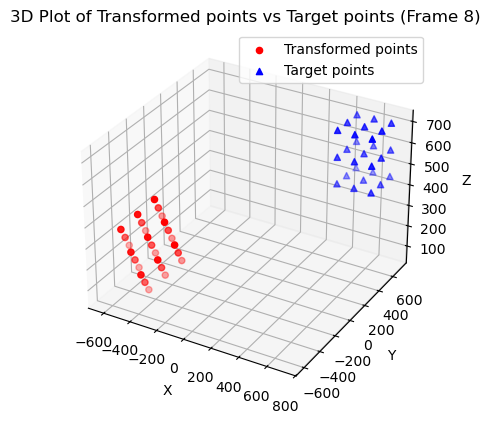

In [36]:
C_expected_results = LA.compute_C_expected_for_all_frames(F_D_point_cloud, F_A_point_cloud, c_vectors)

rmse_results = {}

# Loop through each frame in C_expected_results
for frame_num, C_expected_vectors in C_expected_results.items():
    # Extract C_expected points (already transformed) and real C_i points for the current frame
    C_i_vectors = [LA.Vector(vec.coords[0], vec.coords[1], vec.coords[2]) for vec in frames_data[frame_num]['c_vectors']]  # Real C_i points

    # Convert to NumPy arrays for RMSE calculation
    C_expected_array = np.array([v.as_array() for v in C_expected_vectors])
    C_i_array = np.array([v.as_array() for v in C_i_vectors])

    # Compute the RMSE between C_expected and C_i
    rmse = LA.compute_rmse(C_expected_array, C_i_array)
    rmse_results[frame_num] = rmse

    # Output the RMSE result
    print(f"Frame {frame_num} RMSE: {rmse}")

    # Plot the transformed C_expected vs target C_i
    LA.plot_3d_transformed_vs_target(frame_num, C_expected_vectors, C_i_vectors)

In [37]:
G_points_frames, _, _ = io.read_empivot_file("PA_1_Data/pa1-debug-a-empivot.txt")
small_g_j = LA.process_frame_midpoints(G_points_frames)

In [38]:
F_g_frames = LA.perform_pivot_registration_for_frames(G_points_frames, small_g_j)

In [39]:
points = []

# Loop through each frame and compute midpoints
for frame_num, G_j in F_g_frames.items():
    # Compute the midpoint of the points in the frame
    midpoint = LA.compute_midpoint(G_j)  # G_j is the list of vectors for the current frame
    points.append(midpoint)  # Store the midpoint for later sphere fitting

# Fit a sphere to the computed midpoints
tip_EM_pointer, _, _ = LA.fit_sphere(np.array(points))
tip_EM_pointer = LA.Vector(tip_EM_pointer[0], tip_EM_pointer[1], tip_EM_pointer[2])

P_dimple = {}
for frame_num, frame in F_g_frames.items():
    P_dimple[frame_num] = frame @ tip_EM_pointer

P_dimple


{1: <LinAlg.Vector at 0x15ef6e52bd0>,
 2: <LinAlg.Vector at 0x15ef83b6c90>,
 3: <LinAlg.Vector at 0x15ef6de27e0>,
 4: <LinAlg.Vector at 0x15ef6de3290>,
 5: <LinAlg.Vector at 0x15ef72e6810>,
 6: <LinAlg.Vector at 0x15ef72e4cb0>,
 7: <LinAlg.Vector at 0x15ef8638dd0>,
 8: <LinAlg.Vector at 0x15ef64e1dc0>,
 9: <LinAlg.Vector at 0x15ef712a0f0>,
 10: <LinAlg.Vector at 0x15ef718a3f0>,
 11: <LinAlg.Vector at 0x15ef7189d30>,
 12: <LinAlg.Vector at 0x15ef739c920>}

In [40]:
tip_EM_pointer